In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
% matplotlib inline


In [2]:
df = pd.read_csv('/content/TSLA.csv', index_col= 'Date')
df.rename(columns= {'Adj Close':'Adj_close'}, inplace= True )
df.head()
#df.shape

,Open,High,Low,Close,Adj_close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


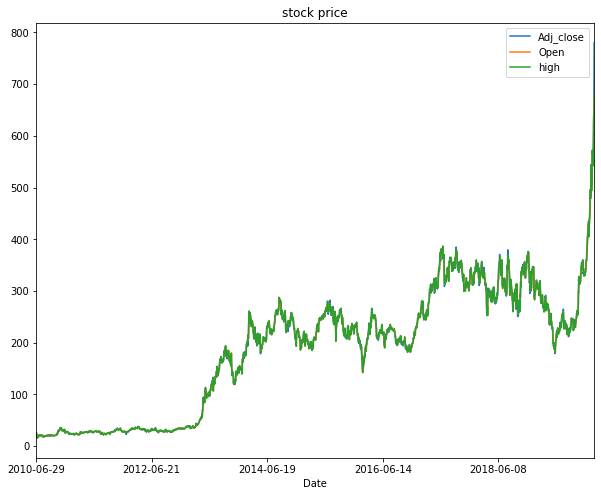

In [3]:
df['Adj_close'].plot(label = 'Adj_close', figsize = (10,8), title = 'Stock price' )
df['Open'].plot(label = 'Open', figsize = (10,8), title = 'Stock price' )
df['Open'].plot(label = 'high', figsize = (10,8), title = 'stock price' )
plt.legend()

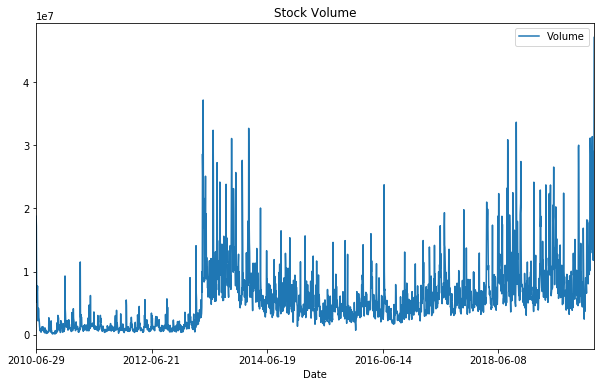

In [4]:
df['Volume'].plot(label = 'Volume', figsize = (10,6), title = 'Stock Volume' )
plt.legend()

In [70]:
closed_price = df.Adj_close.values.astype('float32')
closed_price = closed_price.reshape(-1,1)
closed_price.shape

(2416, 1)

**Preprocessing data**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
closed_price = scaler.fit_transform(closed_price)

In [72]:
train_size = int(len(closed_price)* 0.80)
test_size  = len(closed_price) - train_size
train,test = closed_price[0:train_size,:], closed_price[train_size: len(closed_price),:]
print(len(train),len(test))

1932 484


**Preapring a dataset**

In [0]:
def create_datset(data,time_step):
  X, y = [],[]
  for i in range(len(data)-time_step-1):
    a = data[i:( i + time_step),0]
    X.append(a)
    y.append(data[(i +time_step ),0])
  return np.array(X), np.array(y)


In [0]:
time_step = 1
trainX, trainY = create_datset(train, time_step)
testX, testY = create_datset(test, time_step)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**Building Model**

In [0]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
import math

In [77]:
model = Sequential()

model.add(LSTM(
    input_dim = 1,
    output_dim = 50,
    return_sequences = True
    
))

model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(
     output_dim=1))
model.add(Activation('linear'))
start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.017846107482910156


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [78]:
model.fit(
    trainX,
    trainY,
    batch_size = 18,
    nb_epoch = 10,
    validation_split = 0.1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1737 samples, validate on 193 samples
Epoch 1/10
1737/1737 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 1.4481e-04
Epoch 2/10
1737/1737 [==============================] - 1s 442us/step - loss: 4.8840e-04 - val_loss: 1.5893e-04
Epoch 3/10
1737/1737 [==============================] - 1s 431us/step - loss: 3.5646e-04 - val_loss: 3.0788e-04
Epoch 4/10
1737/1737 [==============================] - 1s 434us/step - loss: 3.3354e-04 - val_loss: 7.2947e-04
Epoch 5/10
1737/1737 [==============================] - 1s 441us/step - loss: 3.2497e-04 - val_loss: 3.6373e-04
Epoch 6/10
1737/1737 [==============================] - 1s 439us/step - loss: 2.9601e-04 - val_loss: 3.3685e-04
Epoch 7/10
1737/1737 [==============================] - 1s 454us/step - loss: 2.6825e-04 - val_loss: 5.1016e-04
Epoch 8/10
1737/1737 [==============================] - 1s 438us/step - loss: 2.6191e-04 - val_loss: 1.5095e-04
Epoch 9/10
1737/1737 [==============================] - 1s 448u

In [0]:
# Plotting data

def plot_results(pred,actual,length):
  plt.plot(scaler.inverse_transform(actual.reshape(-1,1))[length:])
  plt.plot(scaler.inverse_transform(np.array(pred).reshape(-1, 1))[length:])
  plt.legend
  plt.show()


In [0]:
def predict_sequences(model, firstValue, length):
  pred_seq = []
  curr_frame = firstValue

  for i in range(length):
    predicted = []

    print(model.predict(curr_frame[newaxis, :, :]))
    predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
    
    curr_frame = curr_frame[0:]
    curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1],axis = 0)

    pred_seq.append(predicted[-1])

  return pred_seq

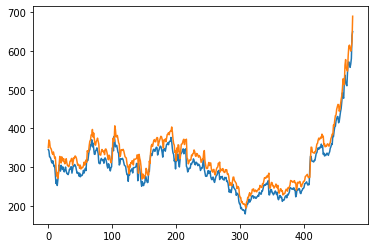

In [81]:
predict_length = 5
predictions = model.predict(testX,predict_length)

#print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
predicted = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
testdata = scaler.inverse_transform(np.array(testY).reshape(-1, 1))
plot_results(predictions, testY, length=predict_length)
#for i in range(len(predicted)):
  #print('Predction is', predicted[i], 'Actual value is',testdata[i])
#print(predicted)
